# Fake News Classifier using TF-IDF Vectorizer

> ## Import Required Libraries

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier

> ## Import the Dataset
The `Fake News` dataset has been downloaded from `Kaggle` datasets

> Dataset Url: https://www.kaggle.com/c/fake-news/data#

In [44]:
df = pd.read_csv('./train.csv', nrows=5000)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [45]:
df.shape

(5000, 5)

In [46]:
df.dropna(inplace=True)
df.shape

(4380, 5)

In [47]:
messages = df.copy()
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [48]:
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [49]:
messages.drop('index', axis=1, inplace=True)

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
ps = PorterStemmer()
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [52]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

> ## TF-IDF Vectorizer

In [53]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf.fit_transform(corpus).toarray()

In [54]:
X.shape

(4380, 5000)

In [55]:
y = messages['label']

> ## Splitting the data into Training and Test datasets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [57]:
tfidf.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abund',
 'abus',
 'academ',
 'academi',
 'acceler']

In [58]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [59]:
count_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names())
count_df.head

<bound method NDFrame.head of       aaron   abandon       abc  abc news  ...  zika  zionist      zone   zu
0       0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.000000  0.0
1       0.0  0.000000  0.063084       0.0  ...   0.0      0.0  0.000000  0.0
2       0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.000000  0.0
3       0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.026345  0.0
4       0.0  0.036726  0.000000       0.0  ...   0.0      0.0  0.035205  0.0
...     ...       ...       ...       ...  ...   ...      ...       ...  ...
2929    0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.000000  0.0
2930    0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.000000  0.0
2931    0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.000000  0.0
2932    0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.000000  0.0
2933    0.0  0.000000  0.000000       0.0  ...   0.0      0.0  0.000000  0.0

[2934 rows x 5000 columns]>

> ## MultinomialNB Algorithm

In [60]:
classifier=MultinomialNB()

In [61]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.889


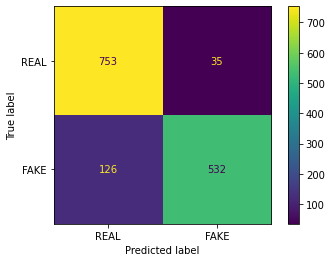

In [62]:
plot_confusion_matrix(classifier, X_test, y_test, display_labels=['REAL', 'FAKE'], values_format='d')

> ## Passive Aggressive Classifier Algorithm

In [64]:
import itertools
linear_clf = PassiveAggressiveClassifier()

In [66]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.938


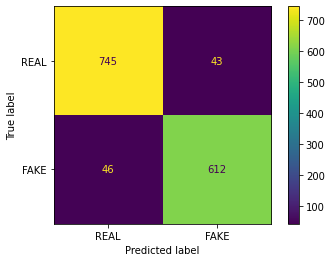

In [67]:
plot_confusion_matrix(linear_clf, X_test, y_test, display_labels=['REAL', 'FAKE'], values_format='d')

> ## Multinomial Classifier with Hyperparameter

In [68]:
classifier=MultinomialNB(alpha=0.1)

In [70]:
import numpy as np
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.901106500691563
Alpha: 0.1, Score : 0.8997233748271093
Alpha: 0.2, Score : 0.8976486860304288
Alpha: 0.30000000000000004, Score : 0.8976486860304288
Alpha: 0.4, Score : 0.8941908713692946
Alpha: 0.5, Score : 0.8941908713692946
Alpha: 0.6000000000000001, Score : 0.8934993084370678
Alpha: 0.7000000000000001, Score : 0.892807745504841
Alpha: 0.8, Score : 0.8921161825726142
Alpha: 0.9, Score : 0.8907330567081605


In [72]:
## Get Features names
feature_names = tfidf.get_feature_names()

In [73]:
classifier.coef_[0]

array([-9.34629884, -8.84508548, -8.6405155 , ..., -8.94759678,
       -8.36463409, -8.39969456])

In [74]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.608857782717733, 'clinton'),
 (-5.667751641757096, 'trump'),
 (-5.83209529645565, 'hillari'),
 (-6.083575931113877, 'elect'),
 (-6.1416880625840164, 'us'),
 (-6.367235711709237, 'peopl'),
 (-6.371083481398433, 'state'),
 (-6.381529083196995, 'vote'),
 (-6.412804782918988, 'email'),
 (-6.43731090106396, 'hillari clinton'),
 (-6.4574918531847825, 'one'),
 (-6.479902749241743, 'fbi'),
 (-6.488295505328878, 'war'),
 (-6.523882359894154, 'like'),
 (-6.537649271711539, 'american'),
 (-6.5460776945810055, 'would'),
 (-6.601190787658835, 'octob'),
 (-6.6208802488859755, 'time'),
 (-6.648440535563003, 'obama'),
 (-6.653443790316295, 'presid')]

In [75]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-9.810192780152008, 'automak'),
 (-9.810192780152008, 'brief post'),
 (-9.810192780152008, 'california today'),
 (-9.810192780152008, 'cardin'),
 (-9.810192780152008, 'cellphon'),
 (-9.810192780152008, 'chef'),
 (-9.810192780152008, 'colbert'),
 (-9.810192780152008, 'critic mr'),
 (-9.810192780152008, 'espn'),
 (-9.810192780152008, 'freedom caucu'),
 (-9.810192780152008, 'gorsuch'),
 (-9.810192780152008, 'hick'),
 (-9.810192780152008, 'jeff poor'),
 (-9.810192780152008, 'judg gorsuch'),
 (-9.810192780152008, 'malaria'),
 (-9.810192780152008, 'mercer'),
 (-9.810192780152008, 'microcephali'),
 (-9.810192780152008, 'miranda'),
 (-9.810192780152008, 'month mr'),
 (-9.810192780152008, 'morn brief'),
 (-9.810192780152008, 'mr ail'),
 (-9.810192780152008, 'mr bannon'),
 (-9.810192780152008, 'mr christi'),
 (-9.810192780152008, 'mr clark'),
 (-9.810192780152008, 'mr cohn'),
 (-9.810192780152008, 'mr dutert'),
 (-9.810192780152008, 'mr erdogan'),
 (-9.810192780152008, 'mr flynn'),
 (-9.810192